## Programmed Calculator about Surplus Change with Price Control

### Required input
1. `price_ceiling`: how much is the price ceiling
2. `price_floor`: how much is the price floor
3. `kd` & `bd`: for the line Price(Qd)=k*Q+b, what is the slope and intercept
4. `ks` & `bs`: for the line Price(Qs)=k*Q+b, what is the slope and intercept

In [1]:
# Default value is -1
price_ceiling = 6
price_floor = -1

#P = kQ + b, d for demand, s for supply
kd = -1 / 2
bd = 15
ks = 1
bs = 0

In [2]:
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve
import numpy as np
q, p = symbols('q p')

# Line equation
D_Eq = Eq(q * kd + bd, p)
S_Eq = Eq(q * ks + bs , p)


def P_Qd(quantity_demanded):
    return quantity_demanded * kd + bd

def P_Qs(quantity_supplied):
    return quantity_supplied * ks + bs

### Find Equilibrium, Consumer/Producer/Total Surplus

In [3]:
EP = tuple(solve((D_Eq,S_Eq), (q, p)).values())

def surplus(EP):
    higher_price = P_Qd(0)
    lower_price = P_Qs(0)
    
    CS = (higher_price - EP[1]) * EP[0] / 2
    PS = (EP[1] - lower_price) * EP[0] / 2
    TS = CS + PS
    return float(CS), float(PS), float(TS)

[CS, PS, TS] = surplus(EP)

print('Equilibrium @ Q={:.4f} P={:.4f}'.format(float(EP[0]), float(EP[1])))
print('\nSurplus \nCS: {:.4f}\nPS: {:.4f}\nTS: {:.4f}'.format(CS, PS, TS))

Equilibrium @ Q=10.0000 P=10.0000

Surplus 
CS: 25.0000
PS: 50.0000
TS: 75.0000


### Elasticity of Demand and Supply

In [4]:
def elasticity(kd, ks, EP):
    #(Abs of slope of line)^-1 * y / x
    elas_demand = abs(kd) ** -1 * EP[1] / EP[0]
    elas_supply = abs(ks) ** -1 * EP[1] / EP[0]
    return elas_demand, elas_supply

elas = elasticity(kd, ks, EP)

print('\nElasticity of demand at equilibrium')
print('E_demand = {:.4f}'.format(elas[0]))
print('E_supply = {:.4f}'.format(elas[1]))
if elas[0] < elas[1]:
    print("\nE_demand < E_supply")
elif elas[0] > elas[1]:
    print("\nE_demand > E_supply")
else:
    print("\nE_demand = E_supply")


Elasticity of demand at equilibrium
E_demand = 2.0000
E_supply = 1.0000

E_demand > E_supply


### Price Control

In [5]:
PF_Eq = Eq(price_floor, p)
PC_Eq = Eq(price_ceiling, p)
if price_floor > 0:
    EP_wPC = tuple(solve((PF_Eq, D_Eq), (q, p)).values())
elif price_ceiling > 0:
    EP_wPC = tuple(solve((PC_Eq, S_Eq), (q, p)).values())
    
# Qd_wPC is the quantity value at new equilibrium
Qd_wPC = EP_wPC[0]
P_at_Qd_wPC = P_Qd(Qd_wPC)
P_at_Qs_wPC = P_Qs(Qd_wPC)

# when price floor > equilibrium
if EP_wPC[1] > EP[1]:
    CS_wPC = (P_Qd(0) - P_at_Qd_wPC) * Qd_wPC / 2
    PS_wPC = (P_at_Qd_wPC - P_Qs(0) + P_at_Qd_wPC - P_at_Qs_wPC) * Qd_wPC / 2
# when price ceiling < equilibrium
else:
    CS_wPC = (P_Qd(0) - P_at_Qs_wPC + P_at_Qd_wPC - P_at_Qs_wPC) * Qd_wPC / 2
    PS_wPC = (P_at_Qs_wPC - P_Qs(0)) * Qd_wPC / 2
    
TS_wPC = CS_wPC + PS_wPC

print('\nQuantity for new Equilibrium: {}'.format(Qd_wPC))

print('\nPrice Control = {}'.format(price_floor if price_floor > 0 else price_ceiling))

print('\nSurplus before price control \nCS: {:.4f} \nPS: {:.4f} \nTS: {:.4f}'.format(CS, PS, TS))
print('\nSurplus with price control \nCS: {:.4f} \nPS: {:.4f} \nTS: {:.4f}'.format(float(CS_wPC), float(PS_wPC), float(TS_wPC)))
print('\nSurplus Changed\n△CS: {:.4f} \n△PS: {:.4f} \n△TS: {:.4f} '.format(float(CS_wPC)-CS, float(PS_wPC)-PS, float(TS_wPC)-TS))

print('\nDWL: {}'.format((P_at_Qd_wPC - P_at_Qs_wPC) * (EP[0] - Qd_wPC) / 2) )


Quantity for new Equilibrium: 6

Price Control = 6

Surplus before price control 
CS: 25.0000 
PS: 50.0000 
TS: 75.0000

Surplus with price control 
CS: 45.0000 
PS: 18.0000 
TS: 63.0000

Surplus Changed
△CS: 20.0000 
△PS: -32.0000 
△TS: -12.0000 

DWL: 12.0000000000000


### Plot the Lines of Demand & Supply with Price Control

Text(6, 6, '(6.0000, 6.0000)')

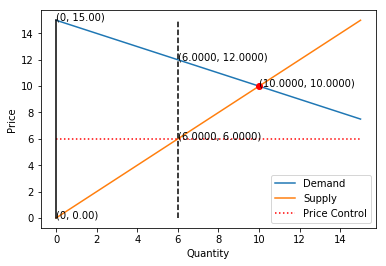

In [8]:
x_quantity = np.linspace(0, int(EP[0]+5), 10)
MWTP = P_Qd(x_quantity)
MC = P_Qs(x_quantity)

plt.plot(x_quantity, MWTP, label="Demand")
plt.plot(x_quantity, MC, label="Supply")
plt.plot(x_quantity, 0 * x_quantity + EP_wPC[1], ':r', label="Price Control")
plt.plot(0 * x_quantity + EP_wPC[0], x_quantity, '--k')
plt.plot(EP[0], EP[1], 'ro')
plt.text(EP[0], EP[1], '({:.4f}, {:.4f})'.format(EP[0], EP[1]))
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.legend(loc="lower right")

plt.plot([0, 0], [bd, bs], 'k')
plt.text(0, bd, '({}, {:.2f})'.format(0, bd))
plt.text(0, bs, '({}, {:.2f})'.format(0, bs))


plt.text(Qd_wPC, P_at_Qd_wPC, '({:.4f}, {:.4f})'.format(float(Qd_wPC), float(P_at_Qd_wPC)))
plt.text(Qd_wPC, P_at_Qs_wPC, '({:.4f}, {:.4f})'.format(float(Qd_wPC), float(P_at_Qs_wPC)))